# Attributive participial clauses in English and learner English
## Elizaveta Kuzmenko

*the project repository can be found [here](https://github.com/ElizavetaKuzmenko/project_R)*

Participles in English can form attributive clauses that look like this: _the boy playing with the kitten, the people involved_. Typically single participles stand before nouns, while participial clauses stand after nouns, though there are some exceptions like _people involved_. In my project I want to:

1. Check and describe the position of participial clauses in native English with regard to the noun.

2. Compare it to the use of participial clauses in learner English.

3. Detect the conditions in learner English in which a participle or a participial clause is used most frequently with a wrong position.

**Categorical input**: voice, verb lemma, head noun lemma.
**Numeric input**: length of clause in words, distance from the head noun.

**Dependent variables**: position, type.

**Hypotheses**:

1. The usage of participial clauses may differ in native and learner's language. For example, the position ratio in the learner language can be abnormal as compared to the native language.

2. Language learners are likely to put the construction in wrong position, e.g. _a dressed in black man_ (correct - _a man dressed in black_), _the involved people_ (correct -- _the people involved_) due to the interference with their native language.

3. The formation of a relative clause instead of a participial construction depends on the length of the clause (the longer the unit is, the more likely it is to be used as a relative clause).

# Collecting data

I have chosen BNC and REALEC as my sources of data. BNC represents L1 (native language) data, and REALEC represents L2 (learner language) data.

For my research I need to construct 3 datasets:

1. Usage cases for attributive participial construction in the L1 corpus: this dataset ideally includes all the cases when a participial construction is used in text. It is needed to describe the characteristics of a participial construction and the factors when choosing the type and the position of a construction with regard to the head noun.
2. Usage cases for attributive participial construction in the L2 corpus: this dataset also includes all the cases when a participial construction is used in text. The purpose of this dataset is to provide data for comparison between L1 and L2.
3. Errors in using attributive participial constructions. This dataset includes all cases when the construction was erroneously used in L2 corpus. This dataset is needed to investigate the factors that trigger an error in the construction.

## Collecting datasets 1 and 2

First I need to collect all the cases when a participle or gerund is used in an attributive clause. The steps I have taken to do this include the following (workflow is identical for both BNC and REALEC):

* First I need to clear the file from all markup and metadata and get raw text. The size of BNC on this step was **13 862 525** tokens and the size of REALEC was **1 211 760** tokens.
* Then I can parse this text to get syntactic analyses of all sentences. To do this, I used [UDPipe tool](http://ufal.mff.cuni.cz/udpipe) and trained my model on [Universal Dependencies for English](https://github.com/UniversalDependencies/UD_English) with default settings.
* After that I set out to extract all constituents that have a verbal form as a head and form __acl__ or __amod__ relations. __acl__ stands for clausal modifier (*a child frightened to death*) and __amod__ stands for adjectival modifier (*a frightened child*). This and the following steps were performed using Python (a script is available [here](https://github.com/ElizavetaKuzmenko/project_R/blob/master/scripts/parse_corpora.py) and also in the repository).
* Having extracted such constituents, I retrieved input features from the data. The resulting data are placed in the repository and can be found [here for BNC](https://github.com/ElizavetaKuzmenko/project_R/blob/master/BNC_data.csv) and [here for REALEC](https://github.com/ElizavetaKuzmenko/project_R/blob/master/REALEC_data.csv).
* **Disclaimer!** The present research does not address the issue of parsing non-standard languages. The parser is most likely to make errors when parsing learners' data, but I just take it as it is.

In the result, my dataframe for BNC consisted of **170 883** points of observation. The dataframe for REALEC consisted of **15 235** points of observation.

I decided to choose a fraction of these data, because working with such a large dataframe in R would be too slow, and also the comparison of L1 and L2 data would be more fair if the number of observation points was identical. Thus, I randomly chose 10 000 observation points from BNC and REALEC.

The features included in the dataset are the following:

* lemma of a verb used in the clause;
* lemma of the head noun governing the clause;
* distance between the clause and the head noun (reflecting the amount of words between them, distance 1 means that the clause follows the head noun);
* length of a clause in words;
* type of the clause: relative clause, participial construction, or clause beginnig with *to*;
* voice of the verb in the clause: passive or active;
* position of the clause - before or after the head noun.

For the matter of convenience, voice and position were also converted into the binary form, in case it is needed for some computations.

## Collecting dataset 3

To determine the clauses in which the usage of an attributive participial clause is erroneous, I explore error annotation available in the REALEC corpus. This corpus has a very elaborated and detailed hierarchy of errors, and in this hierarchy there are 3 error types that appeal to my research objective:

* Attributive participial clause - this tag specifically describes errors in the usage of participial clauses.
* Attribute - this is an old tag which is now replaced with the previous tag.
* Relative clause - this tag is used to describe errors in the usage of relative clauses.

First of all, I collected all the error spans annotated with one of the 3 tags above. Then I found the corresponding sentences that contain the erroneous clause use cases, and all these sentences were passed again to UDPipe in order to retrieve their syntactic analysis. The script for doing this can be found [here](https://github.com/ElizavetaKuzmenko/project_R/blob/master/scripts/collect_errors.py). The features in this dataset are the same as in two previous datasets, only annotation with tags (as they were used in REALEC) are added. The dataset itself can be found [here](https://github.com/ElizavetaKuzmenko/project_R/blob/master/errors_data.csv).

However, the non-naturalness of learners' data can be fully noticed in this dataset. Initially in the corpus 148 sentences that contained error in the use of clause were found. However, more than a half of them were not recognized by the parser as clauses, and the resulting dataset consists only of 49 instances.

## Data Analysis

Let's take a look at the data and prove the concept of this research:

In [3]:
options(repr.plot.width=4, repr.plot.height=3) # loading necessary packages
library(tidyverse)
library(ggplot2)
require(gridExtra)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [4]:
bnc <- read.csv("BNC_data_sample.csv", sep='\t') # load a sample of data for BNC

In [3]:
head(bnc, n = 10)

X,binary.position,binary.voice,distance,head.lemma,length,position,text,type,verb.lemma,voice
136252,0.0,1.0,1.0,chang,10,after,connected with the advance and retreat of the Ice Sheets,part,connect,passive
96281,0.0,1.0,1.0,maximum,9,after,permitted by the retail price index ( RPI ),part,permit,passive
103629,0.0,0.0,1.0,century,2,after,coaching inn,part,coach,active
158366,1.0,0.0,1.0,view,1,before,varying,part,vary,active
140384,0.0,1.0,3.0,gunman,3,after,jack - knifed,part,knif,passive
43690,1.0,1.0,3.0,trainer,2,before,so- called,part,call,passive
152944,1.0,0.0,1.0,document,1,before,supporting,part,support,active
96401,0.0,1.0,1.0,level,4,after,edited by Margaret Unwin,part,edite,passive
27143,1.0,0.0,1.0,bag,1,before,sleeping,part,sleep,active
3060,1.0,1.0,2.0,isolation,1,before,supposed,part,suppos,passive


In [4]:
summary(bnc) # summary is not very informative, but just for fun...

       X          binary.position binary.voice    distance      head.lemma  
 Min.   :    21   0.0 :6246       0.0 :3640    1.0    :4410   way    : 129  
 1st Qu.: 42874   1.0 :3669       1.0 :4861    2.0    :2719   code   :  98  
 Median : 86438   None:  85       None:1499    3.0    : 551   None   :  85  
 Mean   : 86138                                4.0    : 462   time   :  78  
 3rd Qu.:129528                                5.0    : 307   s-unit :  62  
 Max.   :170874                                6.0    : 227   people :  59  
                                               (Other):1324   (Other):9489  
     length          position                 text        type     
 Min.   :  1.000   after :6246   following      :  69   part:8184  
 1st Qu.:  1.000   before:3669   working        :  33   rel : 363  
 Median :  4.000   None  :  85   titleUpdated   :  32   to  :1453  
 Mean   :  5.779                 titlescorrected:  31              
 3rd Qu.:  7.000                 added      

First we need to see how many clauses are used before and after the noun. In the dataset there are sometimes clauses that have position "None", so we need to drop them. As we will often need the cleaned dataset, I created a separate variable for it.

In [5]:
bnc_num_after = nrow(filter(bnc, position == 'after'))
bnc_num_before = nrow(filter(bnc, position == 'before'))
bnc_position = filter(bnc, position == 'after' | position == 'before')
print(bnc_num_after)
print(bnc_num_before)
#plot1 <- ggplot(data=bnc_position, aes(position)) + 
#geom_bar(stat="count") + 
#ggtitle("Position of attributive participial construction with\nregard to the head noun in BNC") + 
#theme(plot.title = element_text(size=10)) + ylab("number of cases") + xlab("position")
#plot1

[1] 6246
[1] 3669


As we can see, there is more participial clauses that stand after the head noun than before it in L1 data. What about L2 data?

In [6]:
realec <- read.csv("REALEC_data_sample.csv", sep='\t')

In [7]:
real_num_after = nrow(filter(realec, position == 'after')) 
real_num_before = nrow(filter(realec, position == 'before'))
realec_position = filter(realec, position == 'after' | position == 'before')
print(real_num_after)
print(real_num_before)
#plot2 <- ggplot(data=realec_position, aes(position)) + 
#geom_bar(stat="count") + 
#ggtitle("Position of attributive participial construction with\nregard to the head noun in REALEC") + 
#theme(plot.title = element_text(size=10)) + ylab("number of cases") + xlab("position")
#plot2

[1] 7001
[1] 2933


In L2 data clauses standing after the head noun are more frequent too. Let's plot the data from the two corpora together, for greater clarity.

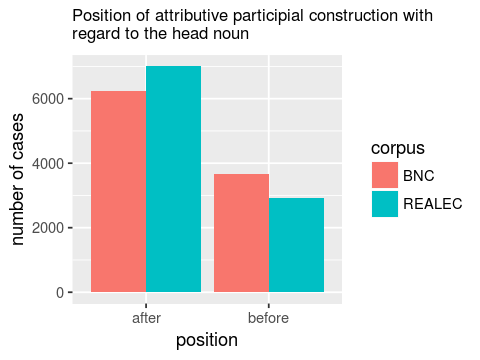

In [8]:
combined1 <- bnc_position
combined1$corpus <- rep('BNC', nrow(bnc_position))
combined2 <- realec_position
combined2$corpus <- rep('REALEC', nrow(realec_position))
combined <- rbind.data.frame(combined1, combined2)
plot3 <- ggplot(data=combined, aes(position, fill=corpus)) + 
geom_bar(stat="count", position='dodge') + 
ggtitle("Position of attributive participial construction with\nregard to the head noun") + 
theme(plot.title = element_text(size=10)) + ylab("number of cases") + xlab("position")
plot3

The difference between numbers in REALEC seems to be more striking than in BNC. But are these numbers really different? I will check it using the Chi-Square Test. The null hypothesis is that there is no factor that influences the difference between REALEC and BNC. The hypothesis is that there is such a factor.

In [9]:
position <- matrix(c(bnc_num_after, real_num_after, bnc_num_before, real_num_before), nrow = 2)
rownames(position) <- c('bnc', 'realec')
colnames(position) <- c('after', 'before')
position

,after,before
bnc,6246,3669
realec,7001,2933


In [20]:
chisq.test(position)


	Pearson's Chi-squared test with Yates' continuity correction

data:  position
X-squared = 124.73, df = 1, p-value < 2.2e-16


To know the effect size, I calculate Cramer's V, which is for 2x2 contingency table is just the *[phi coefficient](https://en.wikipedia.org/wiki/Phi_coefficient)*.

In [22]:
# I calculate Cramer's V as it is listed here - https://www.r-bloggers.com/example-8-39-calculating-cramers-v/
phi = 124.73/(bnc_num_after + real_num_after + bnc_num_before + real_num_before)
phi

[1] 0.006283944

It seems the hypothesis is correct and our investigation could have some sense, but the effect is actually quite small.

## Comparative Analysis of L1 and L2 data

First, we will check how length of a participial clause influences the position of a clause. It is obvious that in L1 data longer units stand after the head noun (typically, all extended participial clauses), whereas single participles are placed before the noun. However, the behaviour and interaction of these factors in L2 is unclear.

Lengths vary significantly as they range from 1 to 100+ words. To make the analysis and visualization more convenient, I logarithmized the lengths. 

In [10]:
options(repr.plot.width=8, repr.plot.height=4) # fix the parameters of plots for double presenting

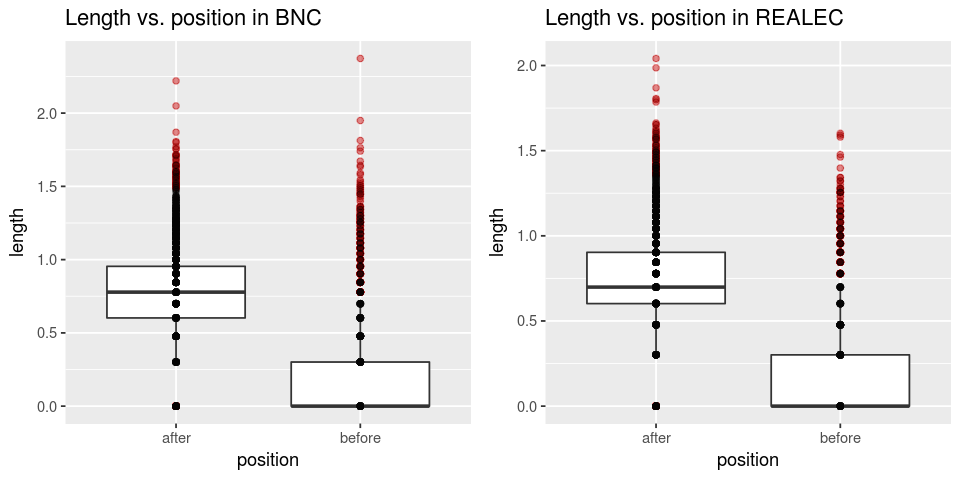

In [11]:
plot4 <- ggplot(data = bnc_position, aes(position, sapply(length, function (x) log10(x)))) + # логарифмировать
  geom_boxplot(outlier.alpha = 0.4, outlier.color= "red")+
  geom_point(alpha = 0.1) +
  xlab("position") + ylab("length") + 
  ggtitle("Length vs. position in BNC")
    
plot5 <- ggplot(data = realec_position, aes(position, sapply(length, log10))) +
  geom_boxplot(outlier.alpha = 0.4, outlier.color= "red")+
  geom_point(alpha = 0.1) +
  xlab("position") + ylab("length") + 
  ggtitle("Length vs. position in REALEC")

grid.arrange(plot4, plot5, ncol=2)
# compute lower and upper whiskers
#ylim1 = boxplot.stats(realec_position$length)$stats[c(1, 5)]

# scale y limits based on ylim1
#p1 = plot4 + coord_cartesian(ylim = ylim1*1.05)
#p1

On this plot the dependence of length and position is shown. The lengths are represented by their logarithms with base 10. Outliers (as they are determined by the boxplot function) are colored in red, and ordinary values are colored in black.

It turns out that the corpora are not strikingly different. Dispersion is high in both corpora, but for both types of corpora the median value for clauses after noun is higher than for clauses before noun. In BNC some extended clauses are nevertheless found before the noun, and  there is a significant number of outliers that stand before the head noun, though their length is more than 10 words.
Median clause length after the noun in BNC is higher than in REALEC, which can be attributed to the style and the level of language mastering, and thus is not of particular interest for our research.

The picture in REALEC is even more consistent than it is in BNC. Once again, the majority of long clauses stand after the head noun, and all outliers (clauses that are very long) are also found after the head noun. However, as in BNC, there are some clauses of length above 10 that stand before the noun.


Now let's take a look at the interdependence of voice and position in a sentence.

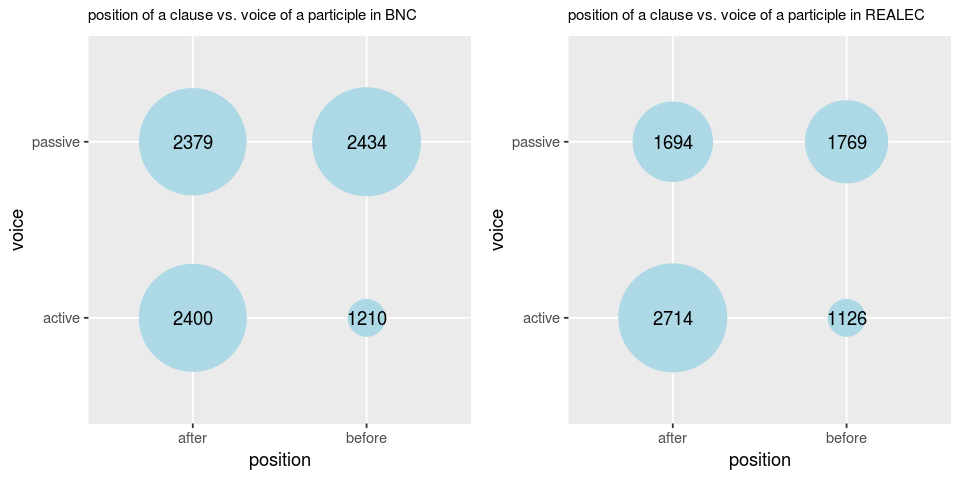

In [12]:
plot6 <- bnc_position %>% filter(voice == 'passive' | voice == 'active') %>% group_by(position, voice) %>% summarise(number = n()) %>% 
  ggplot(aes(position, voice, label=number)) + 
  geom_point(aes(size = number), colour="lightblue") + 
  geom_text() + scale_size(range = c(10, 30)) + guides(size = F) + 
  xlab("position") + ylab("voice") + 
  ggtitle("position of a clause vs. voice of a participle in BNC") + 
  theme(plot.title = element_text(hjust = 0, size = 9))

plot7 <- realec_position %>% filter(voice == 'passive' | voice == 'active') %>% group_by(position, voice) %>% summarise(number = n()) %>% 
  ggplot(aes(position, voice, label=number)) + 
  geom_point(aes(size = number), colour="lightblue") + 
  geom_text() + scale_size(range = c(10, 30)) + guides(size = F) + 
  xlab("position") + ylab("voice") + 
  ggtitle("position of a clause vs. voice of a participle in REALEC") + 
  theme(plot.title = element_text(hjust = 0, size = 9))

grid.arrange(plot6, plot7, ncol=2)

In BNC passive and active verbs are equally distributed between the position "after the head noun", so it is possible to say *a child frightened to death* and *a child smiling to his parents*. As for the position "before the head noun", it is more likely to see a passive verb in this position. It seems that *a smiling child* is less probable than *a frightened child*. 

As for REALEC, the distribution of voice variables is almot the same for the position "before the noun". The number of passive verbs is however less than in BNC, because the majority of verbal forms feature active voice and the position "after the noun". It seems that in the learners' language *a child frightened to death* is less probable than *a child smiling to his parents*. It can be the case that learners are not so good in acquiring passive constructions, and they also belong to a "higher" style than active constructions.

Overall, the plot shows that there is a difference between corpora with regard to the voice of a verbal form in a clause. In L2 there is a preference for active voice after the noun and passive voice before the noun. In L1 active and passive voices are equal in the position "after the noun".

Now let's take a look at the distribution of clause types with regard to position.

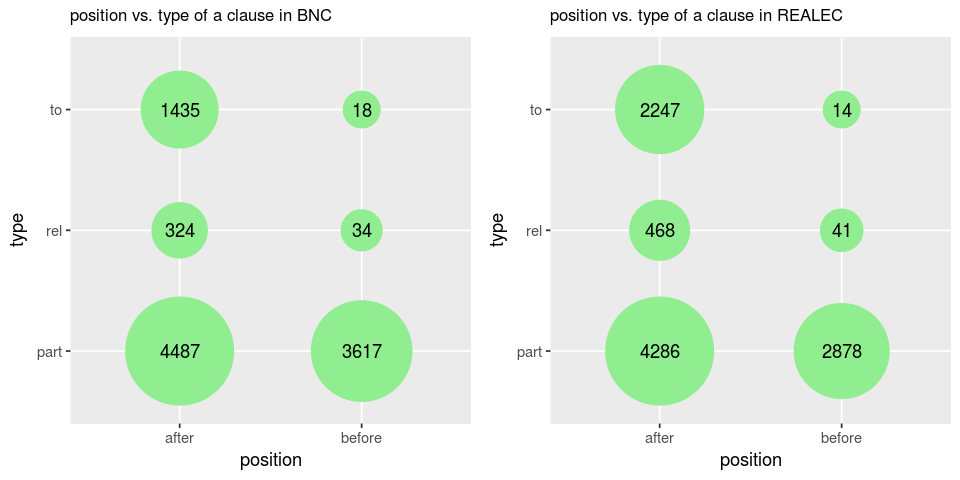

In [65]:
plot8 <- bnc_position %>% group_by(position, type) %>% summarise(number = n()) %>% 
  ggplot(aes(position, type, label=number)) + 
  geom_point(aes(size = number), colour="lightgreen") + 
  geom_text() + scale_size(range = c(10, 30)) + guides(size = F) + 
  xlab("position") + ylab("type") + 
  ggtitle("position vs. type of a clause in BNC") + 
  theme(plot.title = element_text(hjust = 0, size = 10))

plot9 <- realec_position %>% group_by(position, type) %>% summarise(number = n()) %>% 
  ggplot(aes(position, type, label=number)) + 
  geom_point(aes(size = number), colour="lightgreen") + 
  geom_text() + scale_size(range = c(10, 30)) + guides(size = F) + 
  xlab("position") + ylab("type") + 
  ggtitle("position vs. type of a clause in REALEC") + 
  theme(plot.title = element_text(hjust = 0, size = 10))

grid.arrange(plot8, plot9, ncol=2)

The situation in both corpora is the same. Participial constructions are preferred before the noun because of syntactic structure (it is hard to imagine a clause "who talked over the phone a girl" or "to play a game" - the latter is a completely different syntactic structure), and after the noun participial constructions are also more frequently used.

Finally let's take another look at the interaction of position and length of the clause.

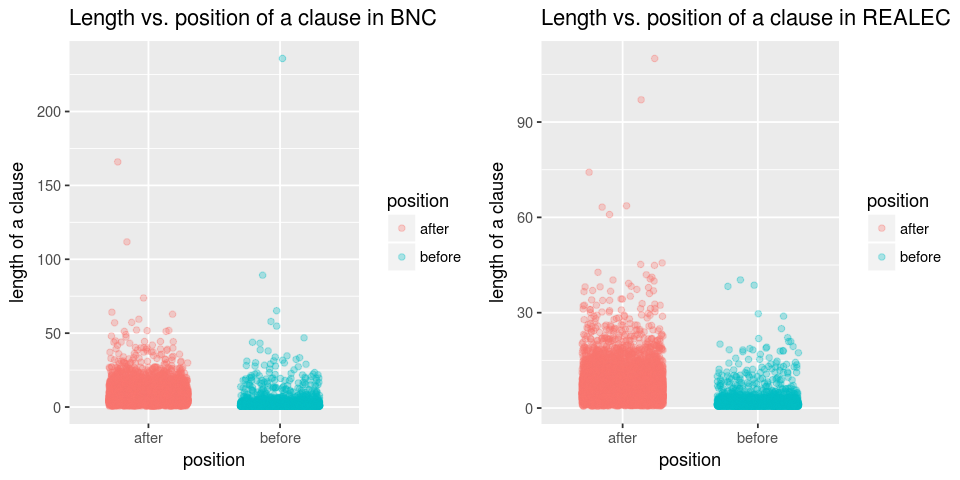

In [70]:
plot10 <- bnc_position %>% 
  ggplot(aes(position, length, color = position))+
  geom_jitter(width = 0.3, alpha = 0.3)+
  labs(title = "Length vs. position of a clause in BNC",
       x = "position",
       y = "length of a clause")

plot11 <- realec_position %>% 
  ggplot(aes(position, length, color = position))+
  geom_jitter(width = 0.3, alpha = 0.3)+
  labs(title = "Length vs. position of a clause in REALEC",
       x = "position",
       y = "length of a clause")

grid.arrange(plot10, plot11, ncol=2)

This plot does not differ a lot from the first plot I have build (boxplot). However, we can make sure that lengths of clauses both before and after the head noun in REALEC are indeed much greater than in BNC.

Now let's explore how the position of a clause can be predicted with logistic regression

In [16]:
fit1 <- glm(binary.position~length, data = bnc_position, family = "binomial")
summary(fit1)
fit2 <- glm(binary.position~length, data = realec_position, family = "binomial")
summary(fit2)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = binary.position ~ length, family = "binomial", 
    data = bnc_position)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5752  -0.7687  -0.2407   0.8262   8.4904  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.39119    0.04427   31.42   <2e-16 ***
length      -0.49184    0.01181  -41.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13067.6  on 9914  degrees of freedom
Residual deviance:  9338.8  on 9913  degrees of freedom
AIC: 9342.8

Number of Fisher Scoring iterations: 7


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = binary.position ~ length, family = "binomial", 
    data = realec_position)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6224  -0.6554  -0.2041   0.7902   8.4904  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.81483    0.05488   33.07   <2e-16 ***
length      -0.81089    0.01844  -43.97   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12055.6  on 9933  degrees of freedom
Residual deviance:  7639.1  on 9932  degrees of freedom
AIC: 7643.1

Number of Fisher Scoring iterations: 7


The regression coefficients for lengths in both corpora are significant in at less than 0.1% level. But characteristics of the resulting model such as Null deviance, Residual deviance and AIC are very high, which means that the model cannot be really predicting.

However, let's try to plot the probability of assigning position to a particular clause judging by the length of this clause. 1 means assigning "before" position and 0 means assigning "after" position.

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

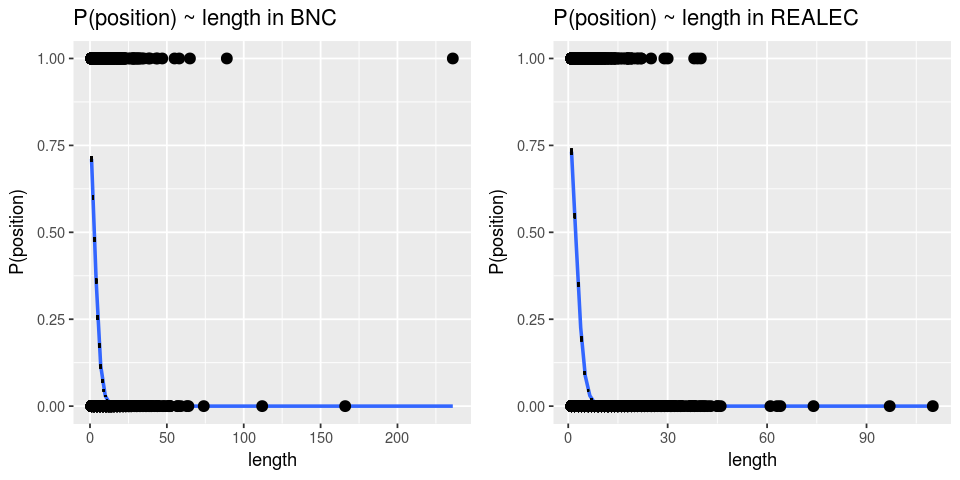

In [17]:
bnc_fit <- cbind.data.frame(bnc_position, predict(fit1, bnc_position, type = "response", se.fit = TRUE)[1:2])
plot12 <- bnc_fit %>%
  mutate(`P(position)` = as.numeric(position) - 1) %>% 
  ggplot(aes(x = length, y = `P(position)`))+
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE)+
  geom_point() +
  geom_pointrange(aes(x = length, ymin = fit - se.fit, ymax = fit + se.fit))+
  labs(title = "P(position) ~ length in BNC",
       x = "length")

realec_fit <- cbind.data.frame(realec_position, predict(fit2, realec_position, type = "response", se.fit = TRUE)[1:2])
plot13 <- realec_fit %>%
  mutate(`P(position)` = as.numeric(position) - 1) %>% 
  ggplot(aes(x = length, y = `P(position)`))+
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE)+
  geom_point() +
  geom_pointrange(aes(x = length, ymin = fit - se.fit, ymax = fit + se.fit))+
  labs(title = "P(position) ~ length in REALEC",
       x = "length")

grid.arrange(plot12, plot13, ncol=2)

As we can see, the two corpora do not differ, and the longer the clause is, the more likely it is to be placed after the sentence. The probability of assigning a long clause before the head noun drops drastically, and clauses of the length around 10 are already placed almost exclusively after the head noun.

We can also build linear models that take into account all other variables except for length to see if they are predictive.

In [108]:
fit <- glm(position~voice + type + distance, data = bnc_position, family = "binomial")
summary(fit)


Call:
glm(formula = position ~ voice + type + distance, family = "binomial", 
    data = bnc_position)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3843  -0.9649  -0.1450   0.9837   3.4132  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -0.30706    0.04228  -7.263 3.79e-13 ***
voiceNone      -1.15230    0.26006  -4.431 9.38e-06 ***
voicepassive    0.78143    0.04826  16.192  < 2e-16 ***
typerel        -1.39551    0.18937  -7.369 1.71e-13 ***
typeto         -2.73784    0.29798  -9.188  < 2e-16 ***
distance10.0   -1.53812    0.30121  -5.107 3.28e-07 ***
distance11.0   -1.50157    0.30628  -4.903 9.46e-07 ***
distance12.0   -0.96373    0.28320  -3.403 0.000666 ***
distance13.0   -1.55596    0.42448  -3.666 0.000247 ***
distance131.0 -15.04043  882.74338  -0.017 0.986406    
distance14.0   -1.33181    0.43543  -3.059 0.002224 ** 
distance15.0   -0.61289    0.32397  -1.892 0.058521 .  
distance152.0 -14.25900  882.74338  -0.

In [29]:
fit <- glm(position~voice + type + distance, data = realec_position, family = "binomial")
summary(fit)


Call:
glm(formula = position ~ voice + type + distance, family = "binomial", 
    data = realec_position)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1343  -0.6854  -0.1039   0.9348   3.4880  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.19027    0.04524  -4.206 2.60e-05 ***
voiceNone     -1.27483    0.20359  -6.262 3.81e-10 ***
voicepassive   0.79196    0.05426  14.597  < 2e-16 ***
typerel       -1.13656    0.17647  -6.441 1.19e-10 ***
typeto        -2.61581    0.31883  -8.204 2.32e-16 ***
distance10.0  -1.24889    0.28741  -4.345 1.39e-05 ***
distance11.0  -1.85846    0.41986  -4.426 9.58e-06 ***
distance12.0  -1.35416    0.43271  -3.129 0.001751 ** 
distance13.0  -2.00414    0.54505  -3.677 0.000236 ***
distance14.0  -0.77193    0.45324  -1.703 0.088545 .  
distance15.0  -3.01181    1.03325  -2.915 0.003558 ** 
distance16.0  -1.88287    1.08672  -1.733 0.083165 .  
distance17.0  -1.91654    0.77626  -2.469 0.01355

The quality of models is not quite good, and there is big variance in the data, but all variables (type, voice, length, most of the distance value) contribute to the distinction of clauses before and after the head noun.

Let's explore the characteristics of our data with Multiple Correspondence Analysis.

In [30]:
require("devtools") # loading libraries needed for MCA
require("FactoMineR")
require("factoextra")

Loading required package: devtools
Loading required package: FactoMineR
Loading required package: factoextra
Loading required package: grid


In [35]:
part_data <- bnc_position[0:1000, ][c("position", "type", "voice")]
mca_bnc <- MCA(part_data)
summary(mca_bnc)


Call:
MCA(X = part_data) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5
Variance               0.688   0.370   0.341   0.230   0.038
% of var.             41.290  22.176  20.462  13.770   2.301
Cumulative % of var.  41.290  63.466  83.928  97.699 100.000

Individuals (the 10 first)
           Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3    ctr   cos2  
1       | -0.184  0.005  0.059 | -0.074  0.001  0.009 |  0.225  0.015  0.088 |
2       | -0.184  0.005  0.059 | -0.074  0.001  0.009 |  0.225  0.015  0.088 |
3       | -0.120  0.002  0.015 |  0.754  0.154  0.599 | -0.587  0.101  0.363 |
4       | -0.583  0.049  0.252 |  0.148  0.006  0.016 | -0.614  0.110  0.279 |
5       | -0.184  0.005  0.059 | -0.074  0.001  0.009 |  0.225  0.015  0.088 |
6       | -0.647  0.061  0.430 | -0.680  0.125  0.475 |  0.199  0.012  0.041 |
7       | -0.583  0.049  0.252 |  0.148  0.006  0.016 | -0.614  0.110  0.279 |
8       | -0.184  0.005  0.059 | -0.074  0.001  0.009 |

Warning message:
“Removed 1 rows containing missing values (geom_point).”

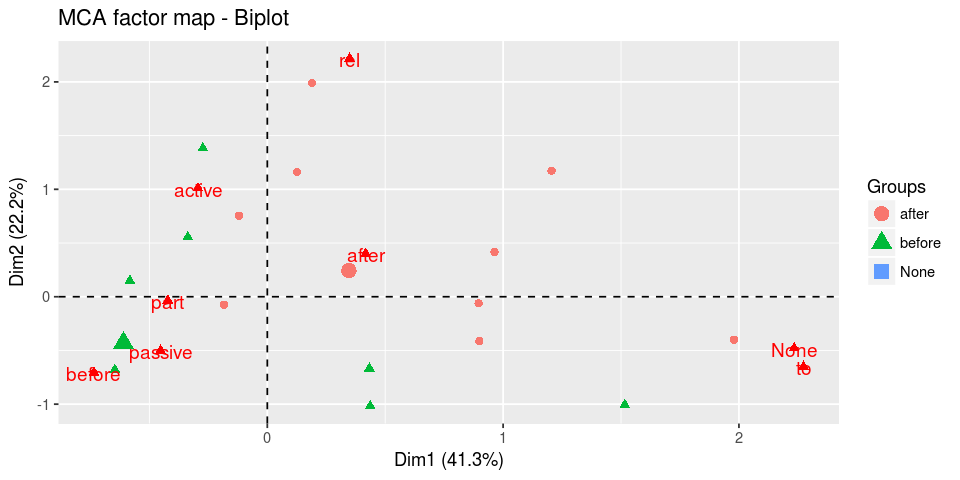

In [40]:
grp <- as.factor(part_data[, "position"])
fviz_mca_biplot(mca_bnc, label="var", habillage=grp)

The picture above shows the data for BNC corpus. It plots bot variables and individual observations on the same axis. As we can see, clauses before and after the head noun are not mixed and can be visually clustered. Passive voice is indeed more characteristic of clauses before head nouns, and participial clauses exclusively can be met before the head noun, so this variable is also close to the center of this position value and characteristic of such clauses.

Active voice can be found among clauses before and after the noun, as we also found out earlier. Clauses in the position after noun have no outstanding variables that characterize them, except that relative and to- clauses are found in this position.

We can also found the degree of contribution of individuals to overall variance.

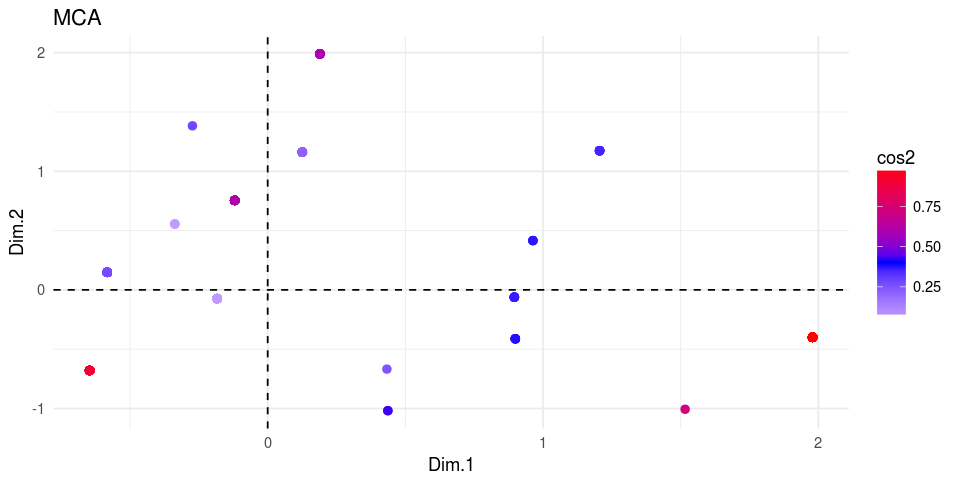

In [39]:
fviz_mca_ind(mca_bnc, col.ind="cos2", geom = "point", 
             jitter = list(width = 0.2, height = 0.2)) +
  scale_color_gradient2(low="white", mid="blue",
                        high="red", midpoint=0.4)+ theme_minimal() +
labs(title = "MCA", x = "Dim.1", y ="Dim.2" )

In [41]:
part_data <- realec_position[0:1000, ][c("position", "type", "voice")]
mca_realec <- MCA(part_data)
summary(mca_realec)


Call:
MCA(X = part_data) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5
Variance               0.711   0.360   0.344   0.217   0.034
% of var.             42.663  21.626  20.666  13.012   2.033
Cumulative % of var.  42.663  64.289  84.955  97.967 100.000

Individuals (the 10 first)
           Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3    ctr   cos2  
1       |  1.489  0.312  0.944 | -0.294  0.024  0.037 | -0.167  0.008  0.012 |
2       |  1.489  0.312  0.944 | -0.294  0.024  0.037 | -0.167  0.008  0.012 |
3       | -0.226  0.007  0.064 |  0.746  0.155  0.693 | -0.383  0.043  0.182 |
4       | -0.752  0.079  0.400 |  0.185  0.009  0.024 | -0.484  0.068  0.166 |
5       |  1.489  0.312  0.944 | -0.294  0.024  0.037 | -0.167  0.008  0.012 |
6       | -0.752  0.079  0.400 |  0.185  0.009  0.024 | -0.484  0.068  0.166 |
7       | -0.830  0.097  0.477 | -0.819  0.186  0.465 |  0.190  0.010  0.025 |
8       | -0.226  0.007  0.064 |  0.746  0.155  0.693 |

Warning message:
“Removed 1 rows containing missing values (geom_point).”

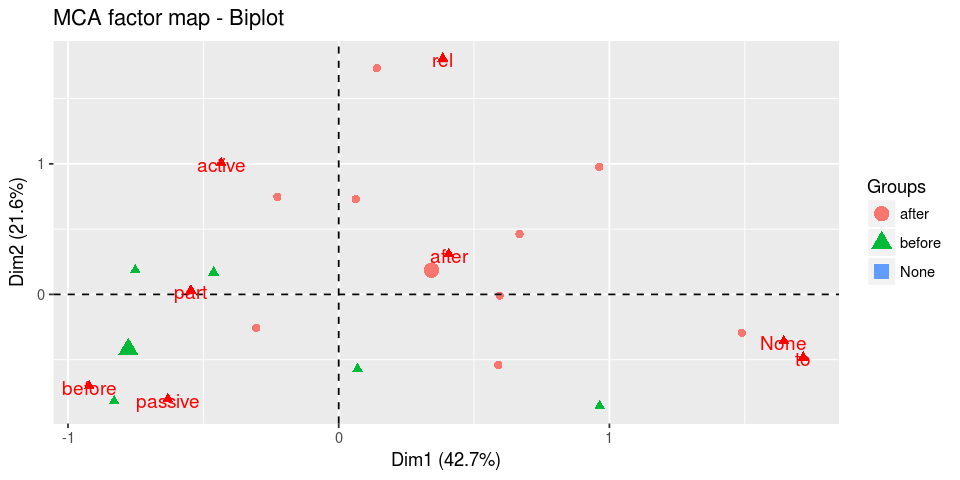

In [42]:
grp <- as.factor(part_data[, "position"])
fviz_mca_biplot(mca_realec, label="var", habillage=grp)

The picture above describes the data for the REALEC corpus. The picture is not much different from BNC. Passive voice is once again characteristic of the clauses before the noun, and the position "after" is more attracted to the active voice. 

The individuals belonging to different groups depending on the position can be divided less easily than in the case of BNC, which means that in L2 there is no strict dependence of the position on some other language variables and that the positions are often confused.

### Conclusions: hypothesis 1

With all the exploratory analysis that was carried out, we can return to the initial hypothesis that was put like that: "The usage of participial clauses may differ in native and learner's language. For example, the position ratio in the learner language can be abnormal as compared to the native language." We can see that this hypothesis is true, because the usage of clauses is indeed different in L1 and L2 corpora, though the difference is not striking. Among major factors of difference I can name the following:

* length of a clause. Commonly, the longer the clause is, the more likely it is to be put after the head noun. We find that this is true in L1 and L2, but in L2 longer clauses are accepted before the head noun, and there are more outliers in L2 judging by length.
* voice of a verb in the clause. In L1 active and passive voices are equally preferred in the clauses after the head noun, and passive voice is more frequently used in the clauses before the head noun. In L2, however, in the clauses after the head noun active voice is used rather than passive voice, so these two values are not equal. Active voice clauses standing after the noun are overall more frequently used, which can be explained that they are simpler and more comprehensible for learners.
* Position and voice are most significant factors when predicting the position of a clause. 
* Type of a clause determines the position in a straightforward way: only participial clauses can be met before the head noun.

### Hypothesis 3

The hypothesis 3 is defined as follows: "The formation of a relative clause instead of a participial construction depends on the length of the clause (the longer the unit is, the more likely it is to be used as a relative clause)."

We can quickly check it with a logistic regression model, where dependent variable is the type of a clause and the factor is the length of the clause.
For the purpose of this research question we will omit clauses starting with "to" and check the data in BNC as it represents literary language.

In [43]:
bnc_filtered <- filter(bnc, type == 'rel' | type == 'part')
unique(bnc_filtered$type)
fit3 <- glm(type~length, data = bnc_filtered, family = "binomial")
summary(fit3)

[1] part rel 
Levels: part rel to


Call:
glm(formula = type ~ length, family = "binomial", data = bnc_filtered)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.7791  -0.2583  -0.2181  -0.1947   2.8197  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.071096   0.083668  -48.66   <2e-16 ***
length       0.114616   0.005696   20.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3003.7  on 8546  degrees of freedom
Residual deviance: 2552.0  on 8545  degrees of freedom
AIC: 2556

Number of Fisher Scoring iterations: 6


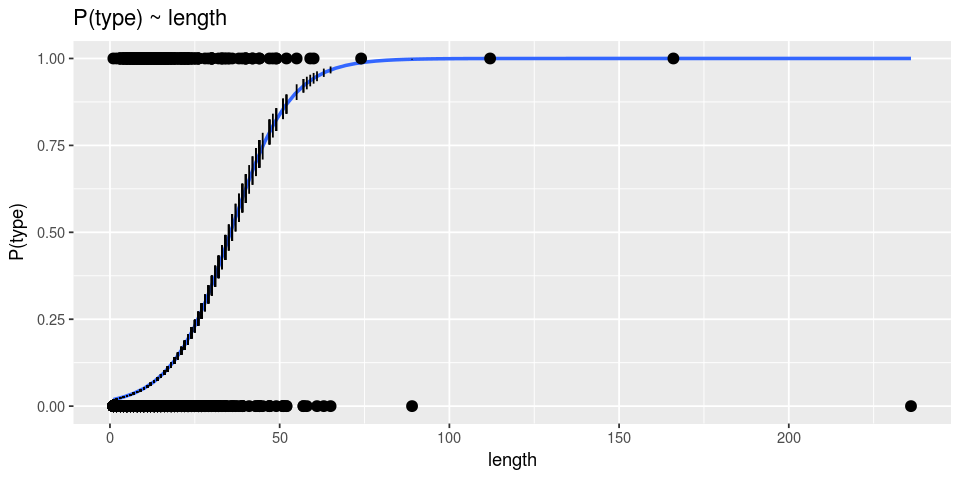

In [44]:
bnc_fit <- cbind.data.frame(bnc_filtered, predict(fit3, bnc_filtered, type = "response", se.fit = TRUE)[1:2])
plot13 <- bnc_fit %>%
  mutate(`P(type)` = as.numeric(type) - 1) %>% 
  ggplot(aes(x = length, y = `P(type)`))+
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE)+
  geom_point() +
  geom_pointrange(aes(x = length, ymin = fit - se.fit, ymax = fit + se.fit))+
  labs(title = "P(type) ~ length",
       x = "length")
plot13

The hypothesis is correct: as the clause becomes longer and longer, the probability of it being a relative clause comes to 100%.

## Exploring errors in L2 data

Now we are occupied with the second hypothesis, and we test in on the third dataset that consists of clauses annotated as erroneous in REALEC.

In [45]:
errors <- read.csv("errors_data.csv", sep='\t')

In [54]:
errors

X,binary.position,binary.voice,distance,head.lemma,length,position,tag,text,type,verb.lemma,voice
0,0.0,0.0,5.0,undergraduate,7,after,Attr_participial,’ rates in 2012 comparing to 2008,part,compare,active
1,0.0,1.0,10.0,column,4,after,Attr_participial,located in the column,part,locate,passive
2,0.0,0.0,2.0,wave,6,after,Attr_participial,entering the area of the chamber,part,enter,active
3,1.0,1.0,4.0,information,1,before,Attr_participial,given,part,give,passive
4,0.0,0.0,17.0,information,19,after,Attr_participial,about what were the average pass rates of first year students from different subjects in 2012 comparing to 2008,part,compare,active
5,0.0,0.0,2.0,way,3,after,Relative_clause,of reducing crime,part,reduce,active
6,0.0,1.0,1.0,product,3,after,Relative_clause,made by workers,part,make,passive
7,1.0,0.0,1.0,countrie,1,before,Relative_clause,developing,part,develo,active
8,0.0,None,2.0,way,22,after,Relative_clause,to punish crimers with a hard work and isolation from the outside world which appears to be really tough considering human psychology,to,punish,None
9,0.0,None,1.0,company,6,after,Relative_clause,lose their job and become unemployed,part,lose,None


First, I will count the number of clauses before and after the head.

[1] 36
[1] 11


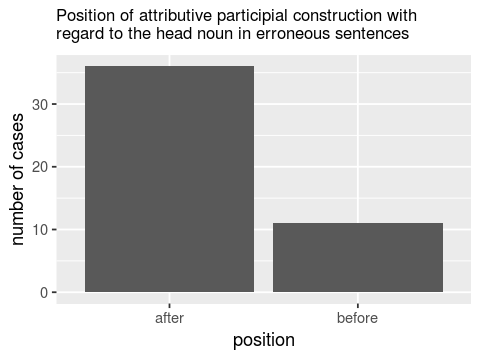

In [48]:
errors_num_after = nrow(filter(errors, position == 'after'))
errors_num_before = nrow(filter(errors, position == 'before'))
errors_position = filter(errors, position == 'after' | position == 'before')
print(errors_num_after)
print(errors_num_before)

options(repr.plot.width=4, repr.plot.height=3)

ggplot(data=errors_position, aes(position)) + 
geom_bar(stat="count") + 
ggtitle("Position of attributive participial construction with\nregard to the head noun in erroneous sentences") + 
theme(plot.title = element_text(size=10)) + ylab("number of cases") + xlab("position")

In [49]:
2933/7001
11/36

[1] 0.4189402

[1] 0.3055556

Though the dataset for erroneous sentences is quite small, the ratio of "after" in "before" is even more unbalanced and biased for clauses after the head noun.
The preference of the position "after" can be explained by the interference of the native language as in Russian it is more common to put a attributive clause after the noun described by it.

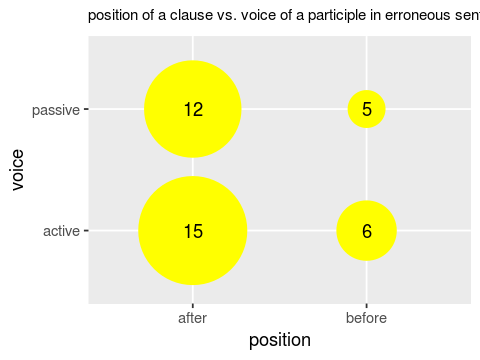

In [52]:
plot <- errors_position %>% filter(voice == 'passive' | voice == 'active') %>% group_by(position, voice) %>% summarise(number = n()) %>% 
  ggplot(aes(position, voice, label=number)) + 
  geom_point(aes(size = number), colour="yellow") + 
  geom_text() + scale_size(range = c(10, 30)) + guides(size = F) + 
  xlab("position") + ylab("voice") + 
  ggtitle("position of a clause vs. voice of a participle in erroneous sentences") + 
  theme(plot.title = element_text(hjust = 0, size = 9))
plot

We can see preference for active voice both in clauses after and before the head noun. For the clauses before the head noun this is a new feature as in L1 and L2 data passive voice was more frequently found in the clauses in this position.

This can be explain in the way that active voice is simpler for learner and is acquired earlier, so the learner tend to form syntactic structures using the active voice if possible at all.

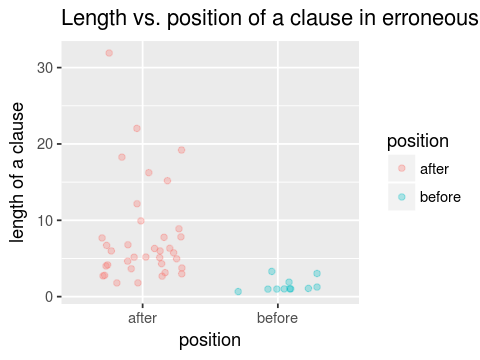

In [55]:
plot <- errors_position %>% 
  ggplot(aes(position, length, color = position))+
  geom_jitter(width = 0.3, alpha = 0.3)+
  labs(title = "Length vs. position of a clause in erroneous sentences",
       x = "position",
       y = "length of a clause")
plot

We can also take a look at the length of the clauses on the boxplot above. What we can see is that attributives that stand before the noun are almost all of length 1, thus, they are single participles and are treated as adjectives.

If a clause has more than one word then it is placed after the noun because it is already a syntactic clause and should be placed in this position as it is treated in the Russian language.

### Conclusion: hypothesis 2

The hypothesis 2 stated that "language learners are likely to put the construction in wrong position, e.g. a dressed in black man (correct - a man dressed in black), the involved people (correct -- the people involved) due to the interference with their native language."

We have found that this hypothesis is also true, and in the learners' language single participles are treated as adjectives and thus are placed before the head noun, irregardless of their nature. Consequently, exception in the English grammar such as *the people involved* are also used before the noun due to the interference with the native language.

Extended participial constructions consisting of more than one word are all put after the head noun, same as attributives in the Russian language. The error described in the hypothesis (*a dressed in black man*) is actually impossible for learners in my model, but the interference is observed all the same.

In addition, it can be shown that learners prefer to use active voice in any position, maybe because it is simpler for acquisition and usage.